<a href="https://colab.research.google.com/github/cs625-datavis-fall20/assignments/blob/master/625_Storytelling_in_R_exercise_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Storytelling in R Exercises

Exercises from [Chapter 28 (Graphics for Communication)](https://r4ds.had.co.nz/graphics-for-communication.html) in [*R for Data Science*](https://r4ds.had.co.nz). 

In [ ]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[28.3 Annotations](https://r4ds.had.co.nz/graphics-for-communication.html#exercises-75)

1) Use `geom_text()` with infinite positions to place text at the
    four corners of the plot.

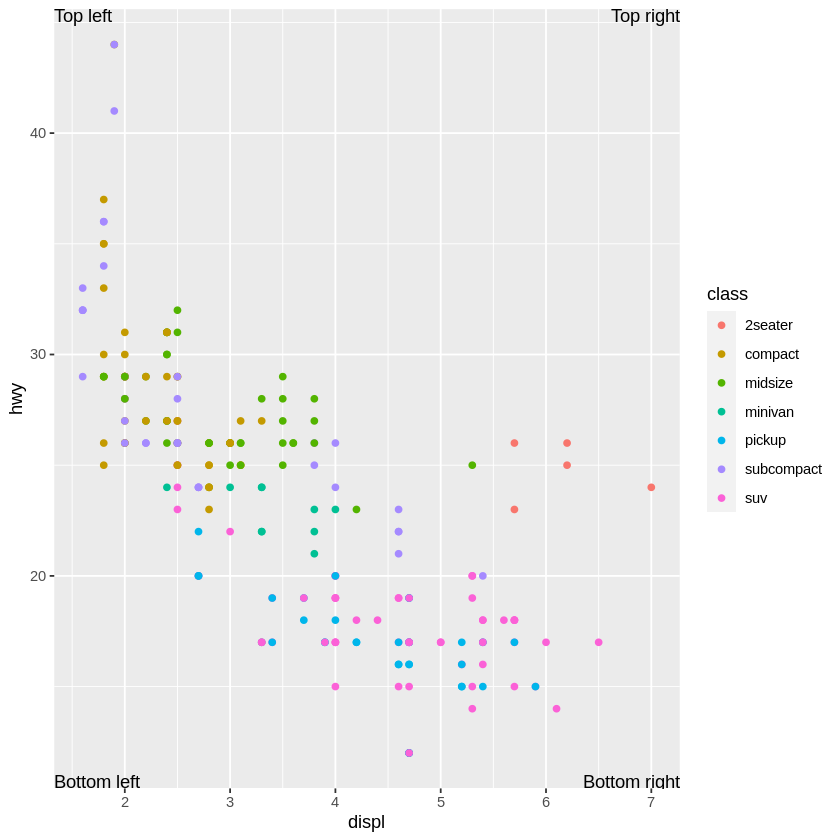

In [ ]:
label <- tribble(
  ~displ, ~hwy, ~label, ~vjust, ~hjust,
  Inf, Inf, "Top right", "top", "right",
  Inf, -Inf, "Bottom right", "bottom", "right",
  -Inf, Inf, "Top left", "top", "left",
  -Inf, -Inf, "Bottom left", "bottom", "left"
)

ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_text(aes(label = label, vjust = vjust, hjust = hjust), data = label)

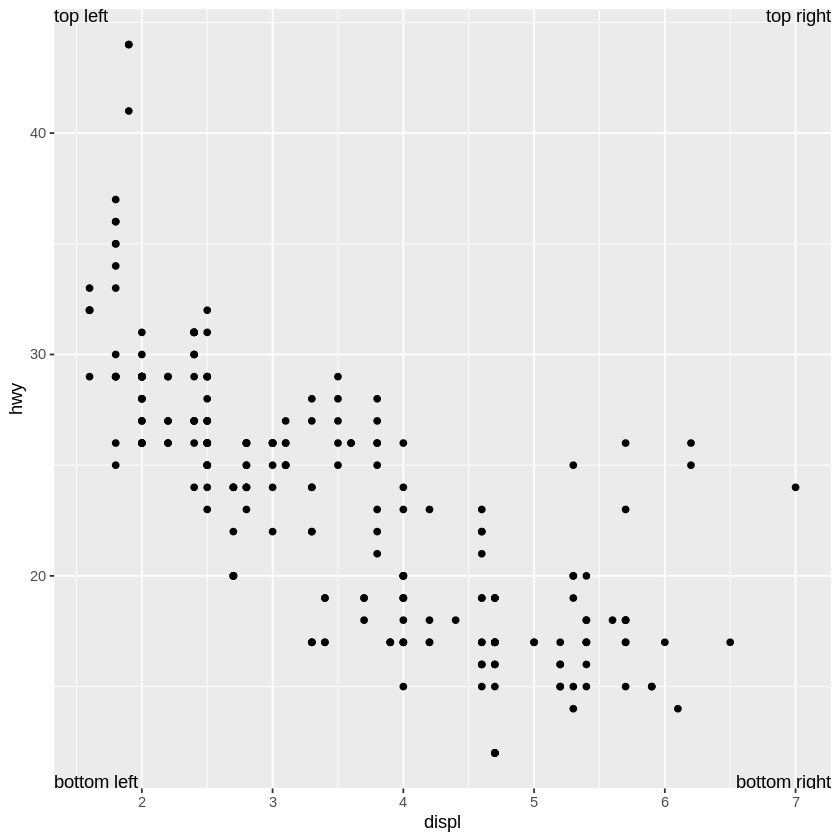

In [ ]:
label_tr <- tibble(
  displ = Inf,
  hwy = Inf,
  label = "top right"
)

label_tl <- tibble(
  displ = -Inf,
  hwy = Inf,
  label = "top left"
)

label_br <- tibble(
  displ = Inf,
  hwy = -Inf,
  label = "bottom right"
)

label_bl <- tibble(
  displ = -Inf,
  hwy = -Inf,
  label = "bottom left"
)

ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  geom_text(aes(label = label), data = label_tr, vjust = "top", hjust = "right") + 
  geom_text(aes(label = label), data = label_br, vjust = "bottom", hjust = "right") + 
  geom_text(aes(label = label), data = label_tl, vjust = "top", hjust = "left") + 
  geom_text(aes(label = label), data = label_bl, vjust = "bottom", hjust = "left")

2) Read the documentation for `annotate()`. How can you use it to add a text
    label to a plot without having to create a tibble?

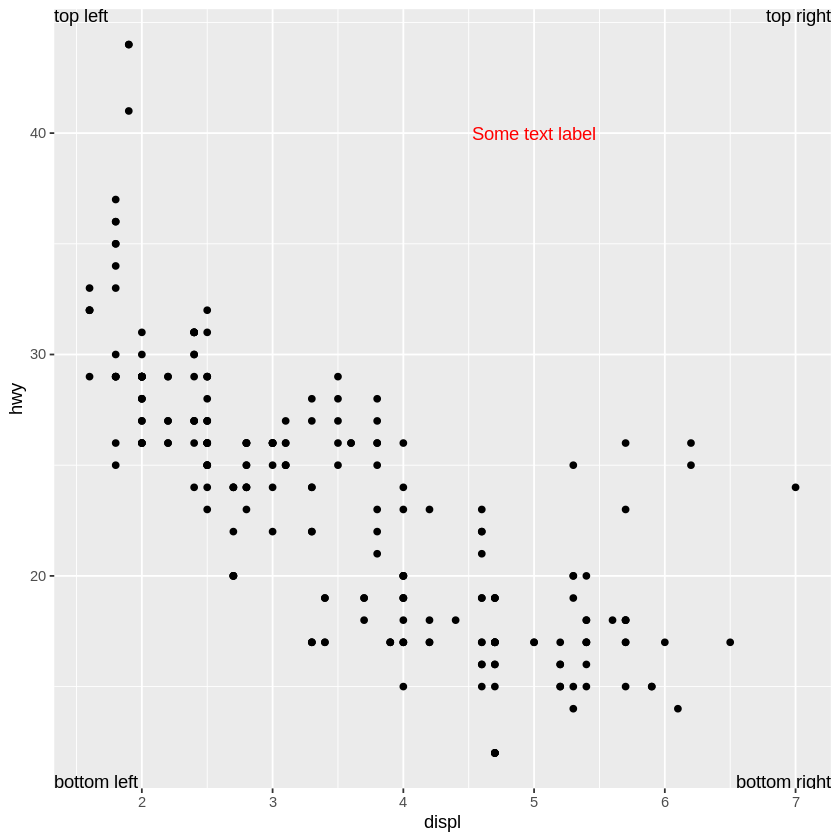

In [ ]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  annotate("text", x=Inf, y=Inf, label="top right", hjust = "right", vjust="top") + 
  annotate("text", x=-Inf, y=Inf, label="top left", hjust = "left", vjust="top") + 
  annotate("text", x=-Inf, y=-Inf, label="bottom left", hjust = "left", vjust="bottom") + 
  annotate("text", x=Inf, y=-Inf, label="bottom right", hjust = "right", vjust="bottom") +
  annotate("text", x = 5, y = 40, label = "Some text label", color = "red")

3) How do labels with `geom_text()` interact with faceting? How can you
    add a label to a single facet? How can you put a different label in
    each facet? (Hint: think about the underlying data.)

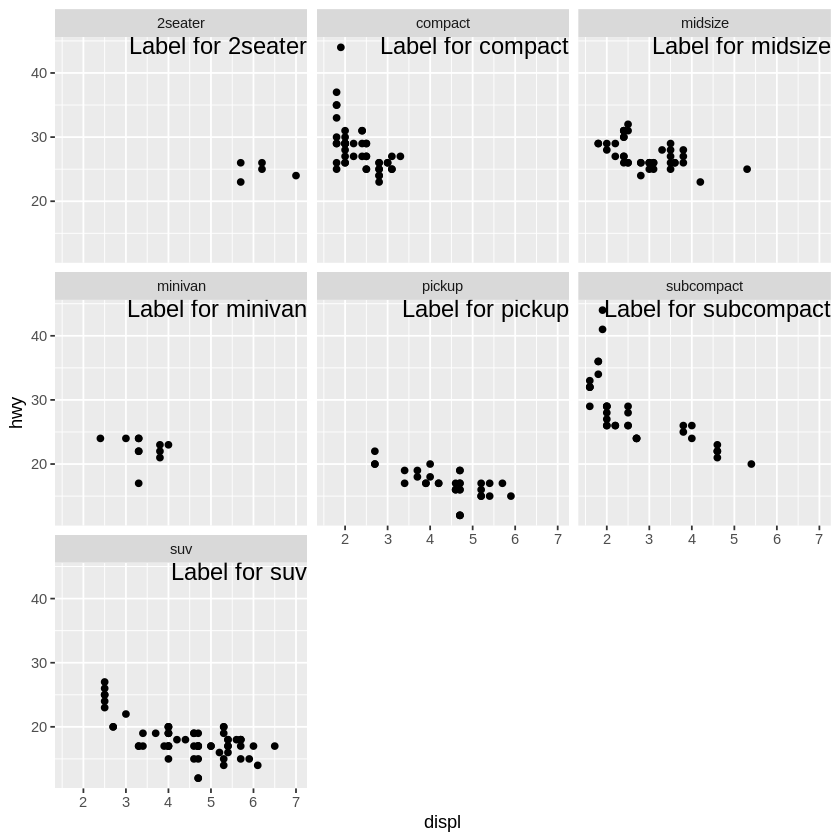

In [ ]:
label <- tibble(displ = Inf,  hwy = Inf,  class = unique(mpg$class),  label = str_c("Label for ", class))
ggplot(mpg, aes(displ, hwy)) +  
geom_point() +  
geom_text(aes(label = label),    data = label, vjust = "top", hjust = "right",    size = 5  ) +
  facet_wrap(~class)

4) What arguments to `geom_label()` control the appearance of the background
    box?

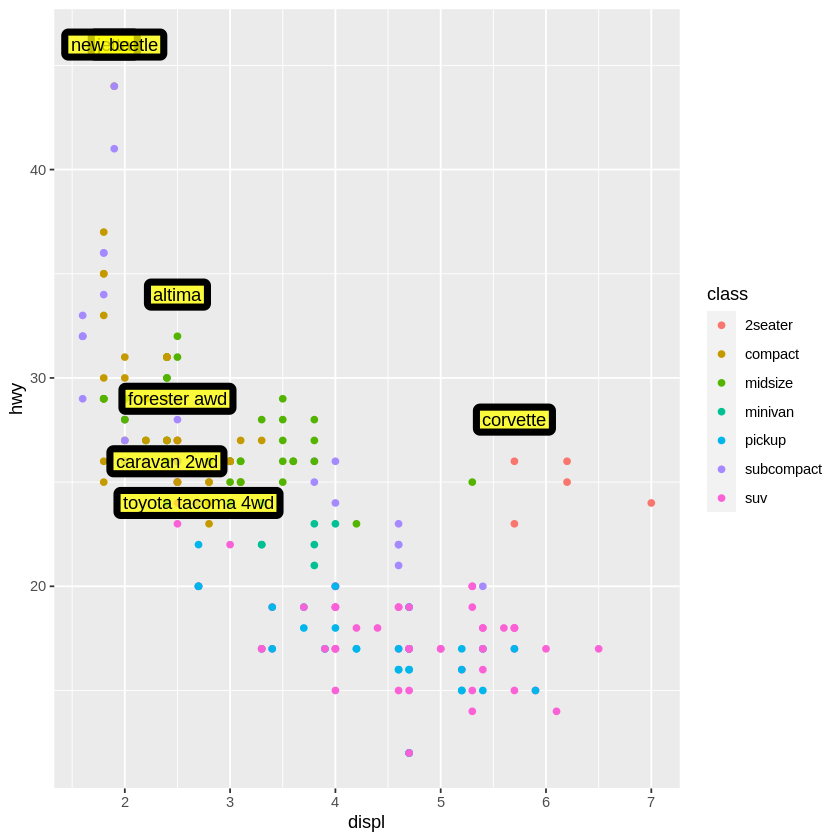

In [ ]:
best_in_class <- mpg %>%
  group_by(class) %>%
  filter(row_number(desc(hwy)) == 1)

ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_label(aes(label = model), data = best_in_class, nudge_y = 2, alpha = 0.75, fill="yellow", label.size=2)

5)   What are the four arguments to `arrow()`? How do they work? Create a series
    of plots that demonstrate the most important options.

In [ ]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_arrow(aes(x=4, y=20), color = "red")

ERROR: ignored

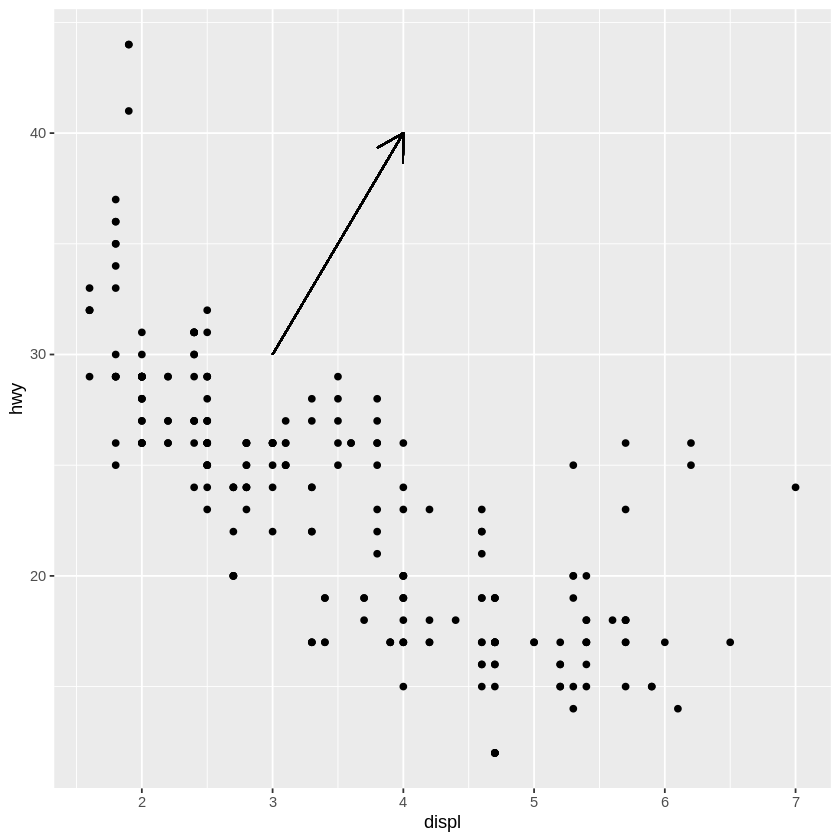

In [ ]:
mpg %>% 
  ggplot(aes(displ, hwy)) +
  geom_point() +
  geom_segment(x = 3, xend = 4, y = 30, yend = 40,
               arrow = arrow())

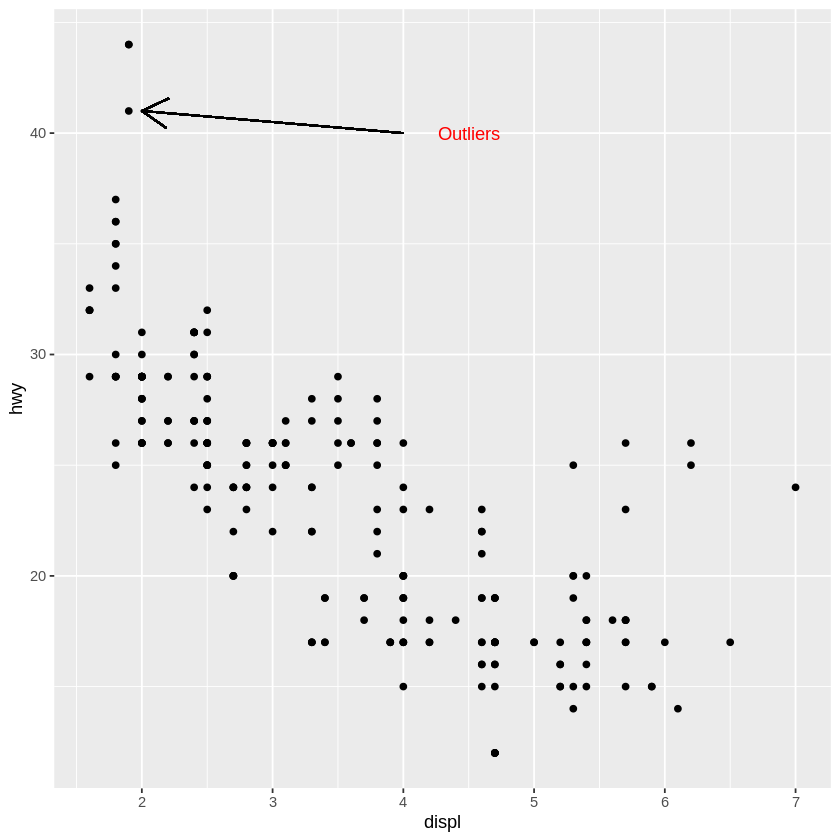

In [ ]:
mpg %>% 
  ggplot(aes(displ, hwy)) +
  geom_point() +
  geom_segment(x = 2, xend = 4, y = 41, yend = 40,
               arrow = arrow(ends = "first"))+
               annotate("text", x = 4.5, y = 40, label = "Outliers", color = "red")

In [ ]:
presidential

name,start,end,party
<chr>,<date>,<date>,<chr>
Eisenhower,1953-01-20,1961-01-20,Republican
Kennedy,1961-01-20,1963-11-22,Democratic
Johnson,1963-11-22,1969-01-20,Democratic
Nixon,1969-01-20,1974-08-09,Republican
Ford,1974-08-09,1977-01-20,Republican
Carter,1977-01-20,1981-01-20,Democratic
Reagan,1981-01-20,1989-01-20,Republican
Bush,1989-01-20,1993-01-20,Republican
Clinton,1993-01-20,2001-01-20,Democratic


[28.4 Scales](https://r4ds.had.co.nz/graphics-for-communication.html#exercises-76)

1) Why doesn't the following code override the default scale?

```r
   ggplot(df, aes(x, y)) +
     geom_hex() +
     scale_colour_gradient(low = "white", high = "red") +
     coord_fixed()
```

2) What is the first argument to every scale? How does it compare to `labs()`?

3) Change the display of the presidential terms by:
1. Combining the two variants shown above.
1. Improving the display of the y axis.
1. Labelling each term with the name of the president.
1. Adding informative plot labels.
1. Placing breaks every 4 years (this is trickier than it seems!).

4) Use `override.aes` to make the legend on the following plot easier to see.

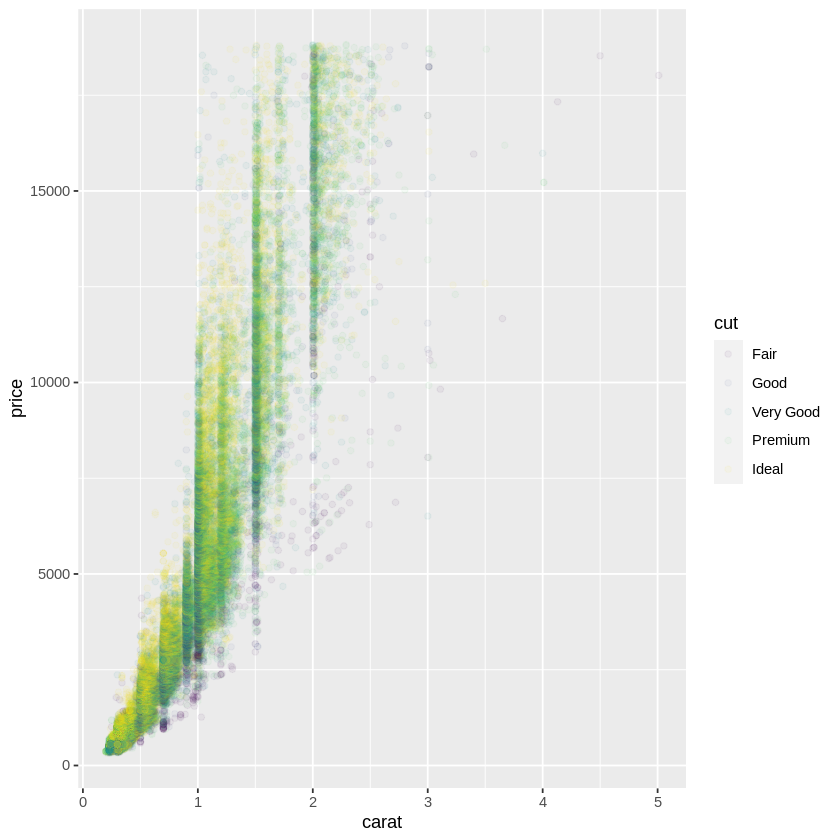

In [ ]:
 ggplot(diamonds, aes(carat, price)) +
    geom_point(aes(colour = cut), alpha = 1/20)